


# 機械学習

大量のデータからパターンやルールを見つけ出し、人間の「学習」に相当する仕組みを実現する手法

犬がいる！と思う（過去に見てきた犬の情報があるから）

## 教師あり

ラベル付きのデータを与えることで、ラベルごとの特徴を調べたり、予測したりする手法



犬の画像

猫の画像　

馬

を見せて

自社製品の購買者（性別　年齢　出身地など）





## 教師なし

ラベルのないデータを与えることで、データをグループ分けしたり、データごとの関連性を調べたりする手法

顧客リスト（）



## 強化学習

「報酬」の定義を与え、報酬を最大化させるためにどんな行動をとるべきか自ら学ばせる手法

AI同士で何度も将棋

ルンバに部屋を何度も掃除させて、最もゴミが取れるための最適な動きを模索する




将棋　チェス


人工知能より











In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 次元削減

+ PCA(主成分分析)
+ SVD(特異値分解)
+ t-SNE
+ UMAP


自動でデータを要約しよう

なるべく情報を


右上にいるほど頭がいい

国語
y軸




原点　　　　　　　　　　x軸　算数

2次元表示　　　　




１次元表示　　　　した時　わからない





5次元を２次元にしたい　　　　社会　理科
(なるべく情報を削げ落とさないように)




In [10]:
df_skill = pd.read_csv("2_2/skill_level.csv",index_col=0)
df_skill # 各個人のスキルレベル

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識
A,7,6,9,10,8
B,2,2,4,3,5
C,7,5,6,5,7
D,7,6,10,9,9
E,9,9,3,4,6
F,6,6,9,9,8
G,3,2,5,6,4
H,10,9,9,8,10
I,5,4,8,5,7
J,2,2,4,3,2


### PCA(主成分分析)

In [11]:
from sklearn.decomposition import PCA

model_dim = PCA(n_components=2)
vecs_list = model_dim.fit_transform(df_skill)
vecs_list # 15人のデータ　を　項目数を2つに　(5次元を2次元にした)

array([[ 3.54540932,  2.87737299],
       [-6.6988638 , -0.65033509],
       [-0.16494841, -1.22336675],
       [ 3.94480771,  3.08691447],
       [ 1.36177017, -6.27925406],
       [ 2.66043708,  2.67667561],
       [-5.20580234,  1.03255023],
       [ 6.95188276, -0.32590835],
       [-1.13081783,  1.09025207],
       [-7.96087192, -1.15843017],
       [-2.1553897 ,  1.79230952],
       [ 5.12151644, -2.50609836],
       [-2.72265636,  0.06253482],
       [-1.60087574,  1.24847108],
       [ 4.05440262, -1.72368801]])

### SVD(特異値分解)

In [26]:
from sklearn.decomposition import TruncatedSVD

model_dim = TruncatedSVD(n_components=2)
vecs_list = model_dim.fit_transform(df_skill)
vecs_list

array([[18.01133639, -2.08959984],
       [ 7.27762252, -1.34850332],
       [13.43360847,  0.88719484],
       [18.48263999, -2.2094704 ],
       [13.5780639 ,  6.1876989 ],
       [17.11594851, -2.12956552],
       [ 9.08409326, -2.55117285],
       [20.52943048,  1.85110185],
       [13.08955913, -1.59539868],
       [ 5.84600801, -1.13171928],
       [12.27621495, -2.53269306],
       [18.16236577,  3.51346277],
       [11.26994049, -0.99784624],
       [12.60578035, -1.82569588],
       [17.33721911,  2.48094994]])

# 寄与率の計算　※PCA/SVD


次元を落としたので　情報が落ちてしまう
どれくらい情報量が残っているか　= 寄与率

In [22]:
model_dim.explained_variance_ratio_ # 残っている情報量 1次元に関して　２次元に関して

array([0.67907875, 0.247028  ])

In [ ]:
0.67907875+0.247028 #1-0.92610675分情報が落ちた　(PCA SVDでしか使えない)

0.92610675

結果の２次元表示

In [ ]:
vecs_list # モデル

array([[18.01133639, -2.08959984],
       [ 7.27762252, -1.34850332],
       [13.43360847,  0.88719484],
       [18.48263999, -2.2094704 ],
       [13.5780639 ,  6.1876989 ],
       [17.11594851, -2.12956552],
       [ 9.08409326, -2.55117285],
       [20.52943048,  1.85110185],
       [13.08955913, -1.59539868],
       [ 5.84600801, -1.13171928],
       [12.27621495, -2.53269306],
       [18.16236577,  3.51346277],
       [11.26994049, -0.99784624],
       [12.60578035, -1.82569588],
       [17.33721911,  2.48094994]])

In [ ]:
vecs_list[:,0] # 0列目　 縦の列が横に並んでる　

array([18.01133639,  7.27762252, 13.43360847, 18.48263999, 13.5780639 ,
       17.11594851,  9.08409326, 20.52943048, 13.08955913,  5.84600801,
       12.27621495, 18.16236577, 11.26994049, 12.60578035, 17.33721911])

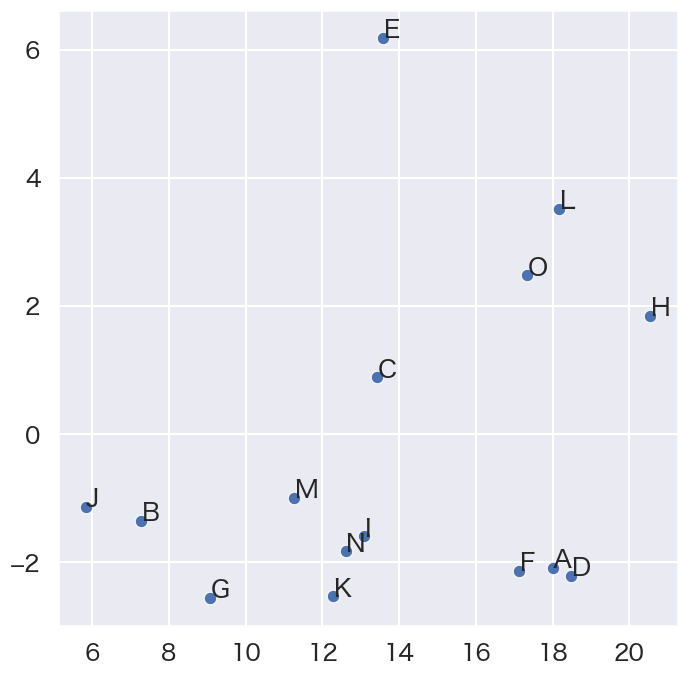

In [ ]:
# x,yの分離
X = vecs_list[:,0]
Y = vecs_list[:,1]

# グラフの作成
sns.set(font="Hiragino Sans",context="talk")
plt.figure(figsize=(8,8))
sns.scatterplot(x=X,y=Y)

# どれがどれに対応しているのか
for i,(x_name,y_name) in enumerate(zip(X,Y)):
    plt.annotate(df_skill.index[i],(x_name,y_name))
plt.show()

#縦が何を横は何を表しているのか　人が考える
#

In [31]:
df_skill

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識
A,7,6,9,10,8
B,2,2,4,3,5
C,7,5,6,5,7
D,7,6,10,9,9
E,9,9,3,4,6
F,6,6,9,9,8
G,3,2,5,6,4
H,10,9,9,8,10
I,5,4,8,5,7
J,2,2,4,3,2


In [33]:
df_skill.sum(axis=1)

A    40
B    16
C    30
D    41
E    31
F    38
G    20
H    46
I    29
J    13
K    27
L    41
M    25
N    28
O    39
dtype: int64

In [32]:
df_skill.sum()

コミュニケーション     88
リーダーシップ       81
プログラミング       97
ネットワーク知識      98
セキュリティ知識     100
dtype: int64

### t-SNE

In [14]:
from sklearn.manifold import TSNE

model_dim = TSNE(n_components=2  , perplexity=min(5, len(df_skill) - 1))
vecs_list = model_dim.fit_transform(df_skill)
vecs_list

array([[-28.930582  ,  27.640364  ],
       [ 54.916252  , -15.1543665 ],
       [  9.133555  ,  -9.467639  ],
       [-32.820004  ,  17.832588  ],
       [-14.338943  , -17.242548  ],
       [-21.917696  ,  19.979     ],
       [ 47.332996  ,  -4.5177765 ],
       [-37.20504   ,   0.45926473],
       [ 19.53376   , -11.969813  ],
       [ 61.645676  ,  -6.868837  ],
       [ 34.93123   ,   6.8064747 ],
       [-26.851488  ,  -5.690739  ],
       [ 34.380646  ,  -4.1946883 ],
       [ 23.536936  ,  -0.5516827 ],
       [-31.33111   , -13.620765  ]], dtype=float32)

UMAP

In [15]:
import numpy
print(numpy.__version__)

2.0.0


In [16]:
import os
print(os.getcwd())

/Users/jozenyuto/Documents/Game/Unity/Unity_Lesson/docs/就活/_AI教育_全体の流れ/2_Python_機械学習


In [17]:
import umap.umap_ as umap

In [18]:
from scipy.sparse.csgraph import connected_components

# クラスタリング

# アソシエーション分析(バスケット分析)

分析の実行